In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\Maximum Yearly discharge .csv").dropna()


In [3]:
df.head(10)

,Year,flow
0,1963,997.2
1,1964,1133.8
2,1965,2927.0
3,1966,495.5
4,1967,624.8
5,1968,3272.7
6,1969,2843.4
7,1970,2318.7
8,1971,1586.7
9,1972,2540.0


In [4]:
df = df.set_index('Year')

<AxesSubplot:xlabel='Year'>

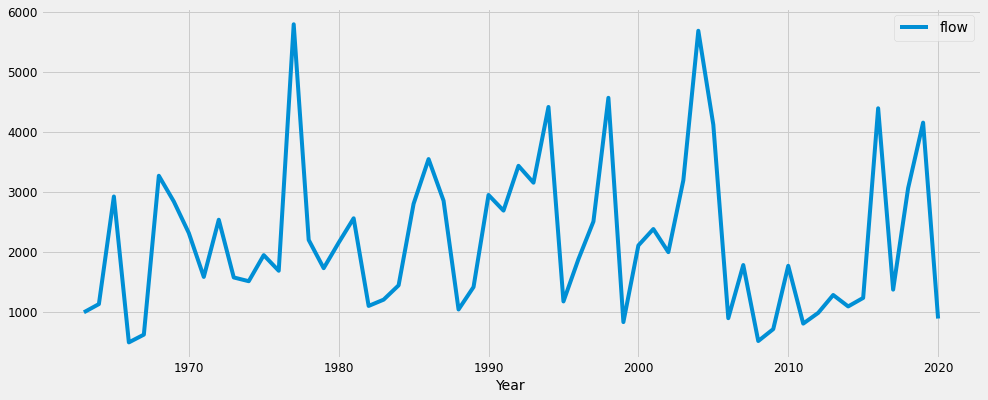

In [5]:
df.plot(figsize = (15,6))

In [6]:
df.columns


Index(['flow'], dtype='object')

In [7]:
df = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\Maximum Yearly discharge .csv", parse_dates=['Year']).dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    58 non-null     datetime64[ns]
 1   flow    58 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [9]:
df.describe()

,flow
count,58.000000
mean,2198.198621
std,1266.989726
min,495.500000
25%,1185.395000
50%,1916.300000
75%,2909.375000
max,5797.300000


In [10]:
df.shape

(58, 2)

In [11]:
#time series analysis and forecasting.
data = df[['Year','flow']]

In [12]:
data.shape

(58, 2)

In [13]:
data = df.groupby('Year')['flow'].sum().reset_index()

In [14]:
#Indexing with Time Series Data
data = data.set_index('Year')
data.index

DatetimeIndex(['1963-01-01', '1964-01-01', '1965-01-01', '1966-01-01',
               '1967-01-01', '1968-01-01', '1969-01-01', '1970-01-01',
               '1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01',
               '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
      

In [15]:
#Our current datetime data can be tricky to work with, therefore, we will use the averages Montly Flow.
y = data['flow']#.resample('M').mean() #Monthly Mean
#y = data['flow'].resample('Q').mean() # Quaterly Mean
#y = data['flow'].resample('SM').mean() #SM : semi-month end frequency (15th and end of month)
#y = data['flow'].resample('W').mean() #Weekly avearge  

In [16]:
#We can also visualize our data using a method called time-series decomposition that allows us to decompose
#our time series into three distinct components: 
#trend, seasonality, and noise.

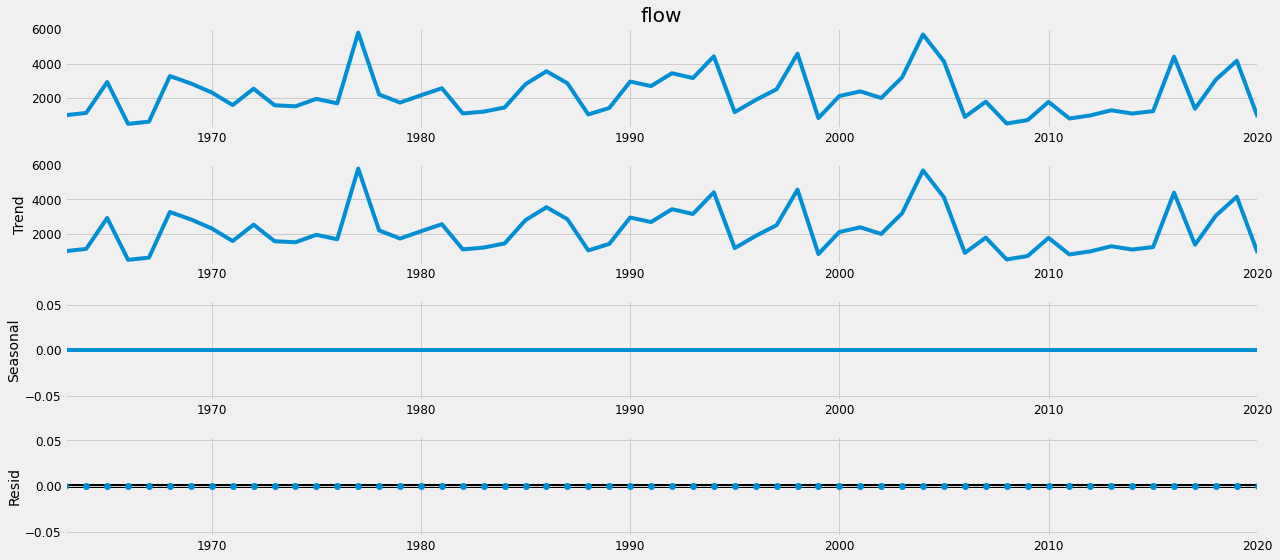

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). 
#These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Grid Serach

This step is parameter Selection for our data SARIMAX Time Series Model.
Our goal here is to use a “grid search” to find the optimal set of parameters
that yields the best performance for our model.

# SARIMAX IMPLEMENTAION

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            #mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_invertibility=False)
           
            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1057.9829359808925
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:816.382286679453
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:797.2052469167039


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1415.2498027357408
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:812.0464973250214
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:793.9227152778824
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:597.9955025462797


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1552.190355002908
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1012.206283334343
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:790.3631151510501
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:780.7775281105116


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1565.3205799621355
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:810.9141709672716
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:776.2247657512253
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:598.6607200322629
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1383.2635685028831


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:990.9516043470928
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:784.4019337100842
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:801.126700619788


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1326.257895856319
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:800.524022688443
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:785.3277258496398
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:598.5124657129372


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1268.3420977158535
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:951.0422352868111
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:745.328501708052
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:767.5742524053768
SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1323.8945441770768
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:783.2480081571647


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:744.4989070592231
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:586.0583558621291


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1205.2260653395253
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1003.3799411284689
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:796.4420459612955
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:797.3029871847917


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1268.6678089752295
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:792.7965410037044
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:791.5531073043368
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:582.3620508971275


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1332.8774886444944
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:970.9011583221421
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:768.2120944362872
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:782.6355071472979


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1109.1321569981137
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:784.515169883575
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:769.981270031673
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:584.1541034861577


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1341.1686558543327
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:984.681873406603
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:778.924038081451
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:795.019657570449


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1478.30615076521
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:778.1546896585468
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:779.7505627482813
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:577.6632749506698


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1481.3208609479102
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:950.0118538474804
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:744.9646488970089


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:768.3270419514765


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1243.6714935172033
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:767.1997292694011
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:746.1362348896477
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:569.8703764819023


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1379.644894388429


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:569.8703764819023

Therefore we should consider this to be optimal option.

In [20]:
#Fitting the SARIMAX model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                               # enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1831      0.185      0.990      0.322      -0.180       0.546
ma.L1         -0.9037      0.104     -8.703      0.000      -1.107      -0.700
ar.S.L12      -0.4990      0.131     -3.798      0.000      -0.757      -0.242
sigma2      2.188e+06   6.31e+05      3.466      0.001    9.51e+05    3.43e+06


C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\manso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


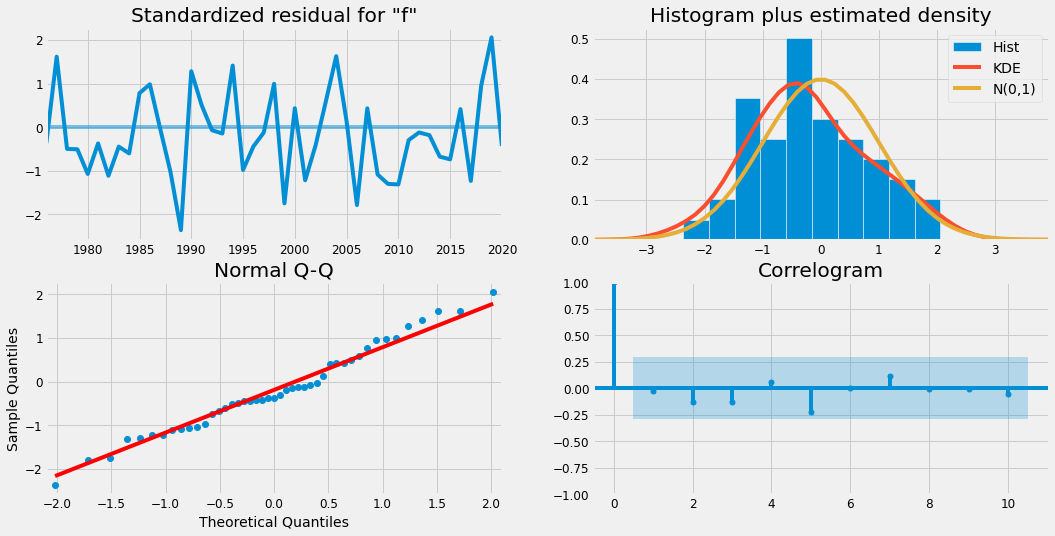

In [21]:
#We should always run model diagnostics to investigate any unusual behavior.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

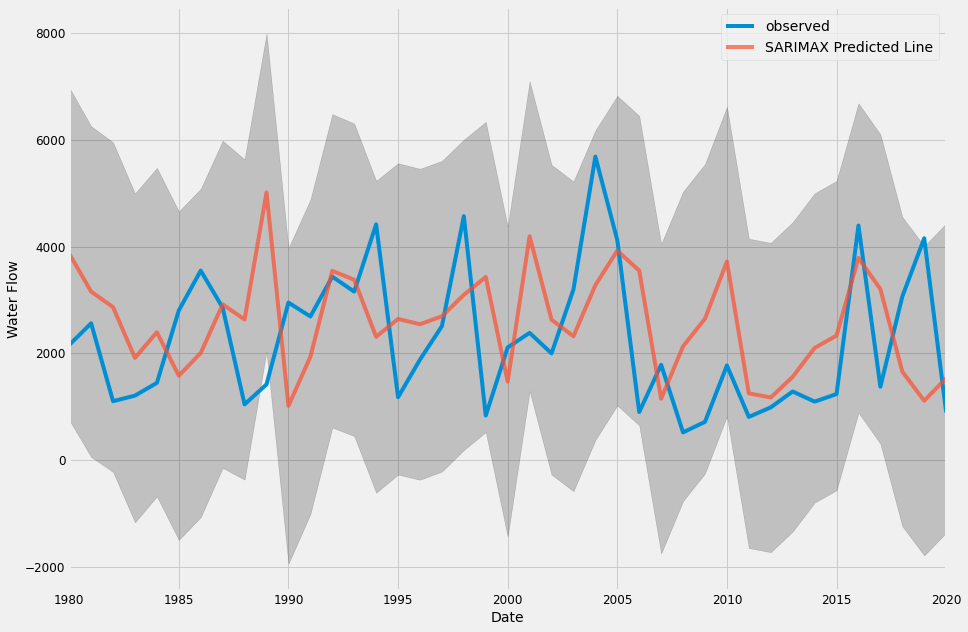

In [22]:
pred1 = results.get_prediction(start=pd.to_datetime('1980-01-1'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1980':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 10))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

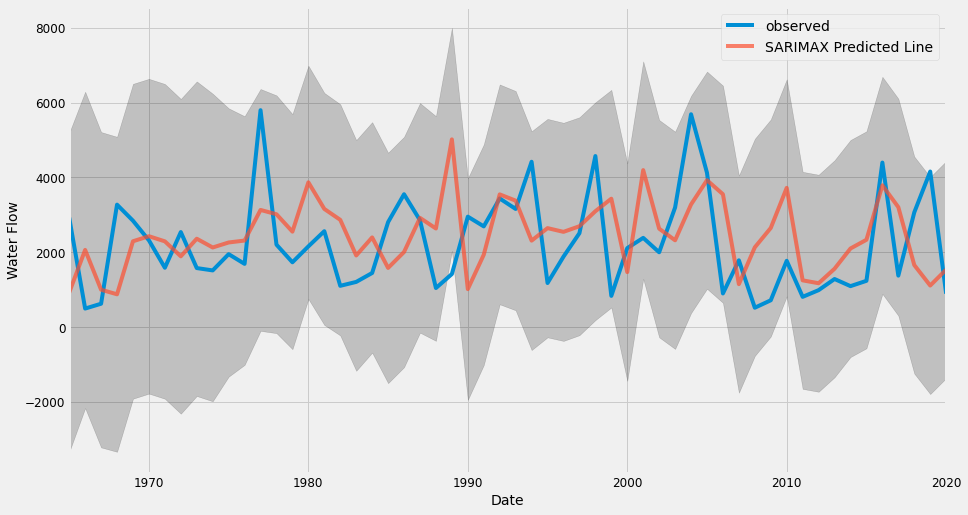

In [23]:
pred1 = results.get_prediction(start=pd.to_datetime('1965-01-1'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1965':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

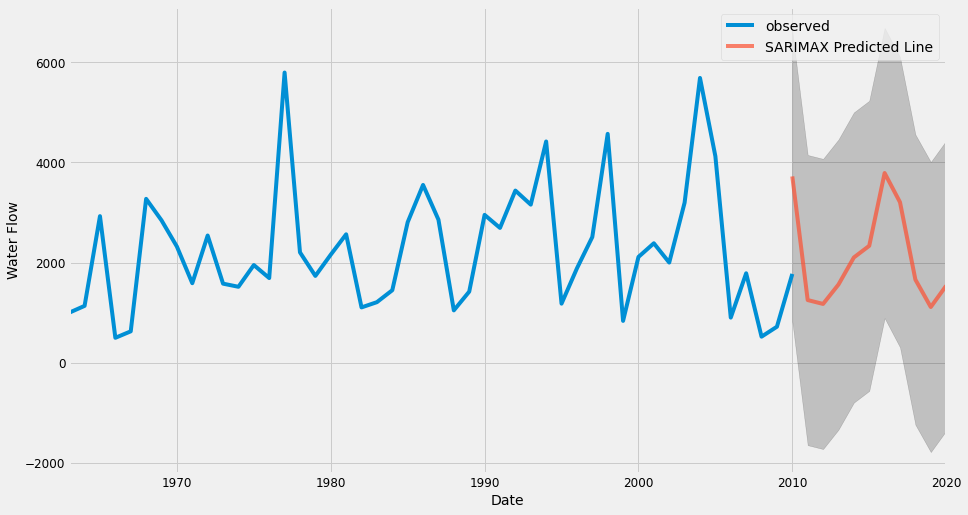

In [24]:
pred1 = results.get_prediction(start=pd.to_datetime('2010-01-1'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1963':'2010'].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

In [25]:
forecast1 = pred1.predicted_mean
actual1 = y
print('The SARIMAX Mean Aboslute Percentage Error of our forecasts is {}'.format(np.mean(np.abs(forecast1 - actual1)/np.abs(actual1))))

The SARIMAX Mean Aboslute Percentage Error of our forecasts is 0.6575327232247314


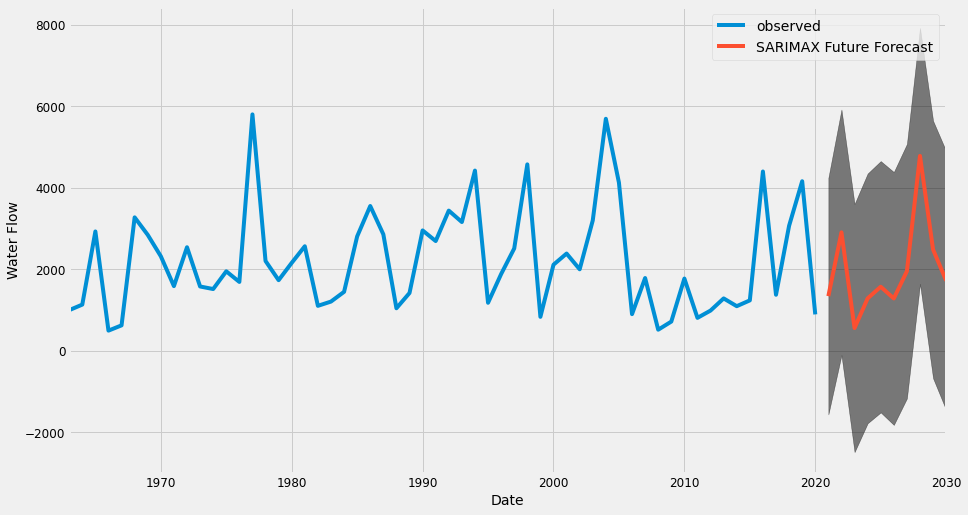

In [26]:
#Producing and visualizing forecasts
pred_uc1 = results.get_forecast(steps=10)
pred_ci1 = pred_uc1.conf_int()
ax = y.plot(label='observed', figsize=(14, 8))
pred_uc1.predicted_mean.plot(ax=ax, label='SARIMAX Future Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()


# ARIMA IMPLEMENTATION

In [27]:
# Testing For Stationary 
from statsmodels.tsa.stattools import adfuller 

In [28]:
test_result = adfuller(y)

In [29]:
#H0 : it is non stationary 
#H1 : it is stationary 

def adfuller_test(y):
    result = adfuller(y)
    labels = [' ADF Test statistic',' p-value ','lags used', 'Number of Observations used']
    for value, label in zip(result, labels):
              print(label+ ':' +str(value))
    if result[1] <= 0.05:
              print('Strong Evidence againt null hypothesis(H0), reject the null hypothesis. Data has no unit root and stationary ')
    else:
              print('Week Evidence againt null hypothesis, time series has unit root, indicating it is non stationary')

In [30]:
adfuller_test(y)

 ADF Test statistic:-6.379361527475273
 p-value :2.242181647777701e-08
lags used:0
Number of Observations used:57
Strong Evidence againt null hypothesis(H0), reject the null hypothesis. Data has no unit root and stationary 


In [31]:
from pmdarima import auto_arima
#Ignore harmless warnings 
import warnings 
warnings.filterwarnings('ignore')

In [32]:
stepwise_fit = auto_arima(y,trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1002.468, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=996.338, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=997.079, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=996.816, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1075.649, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=998.934, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.090 seconds


In [33]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [34]:
model=sm.tsa.arima.ARIMA(y,order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   flow   No. Observations:                   58
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -495.406
Date:                Sun, 17 Apr 2022   AIC                            996.812
Time:                        00:44:54   BIC                           1002.994
Sample:                    01-01-1963   HQIC                           999.220
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2198.1986    242.799      9.054      0.000    1722.321    2674.077
ma.L1          0.1803      0.151      1.194      0.232      -0.116       0.476
sigma2      1.533e+06   3.12e+05      4.915      0.000    9.22e+05    2.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.92   Prob(JB):                         0.02
Heteroskedasticity (H):               1.53   Skew:                             0.85
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

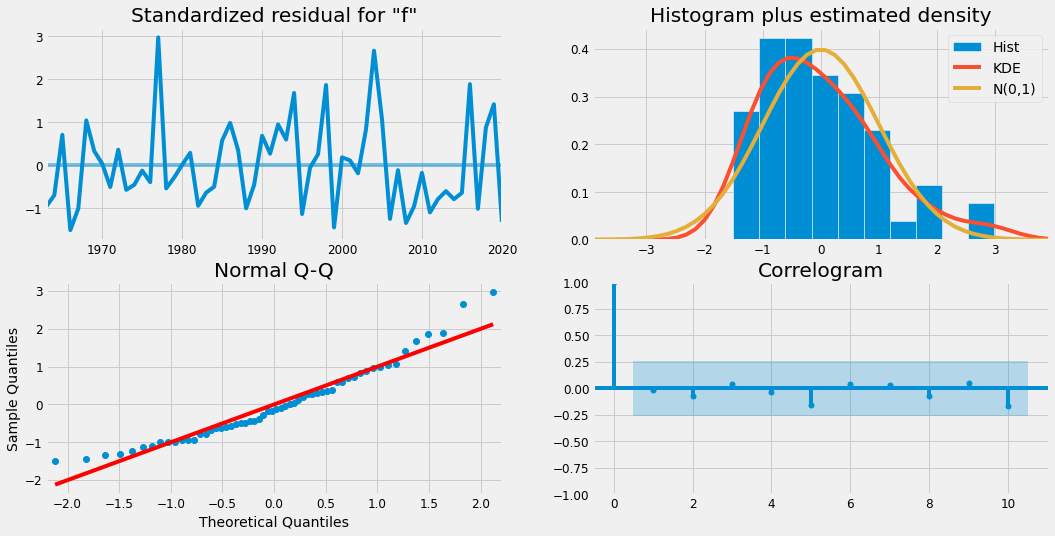

In [35]:
#We should always run model diagnostics to investigate any unusual behavior.
model.plot_diagnostics(figsize=(16, 8))
plt.show()

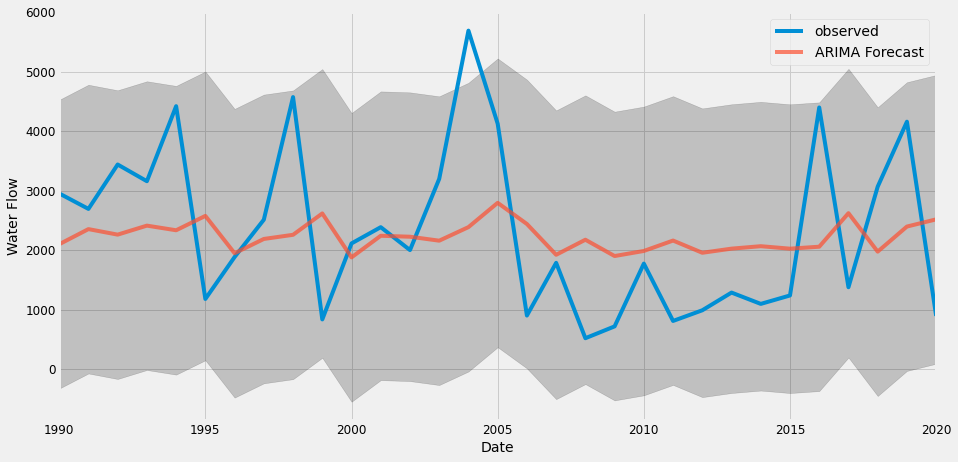

In [36]:
pred = model.get_prediction(start=pd.to_datetime('1990-01-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

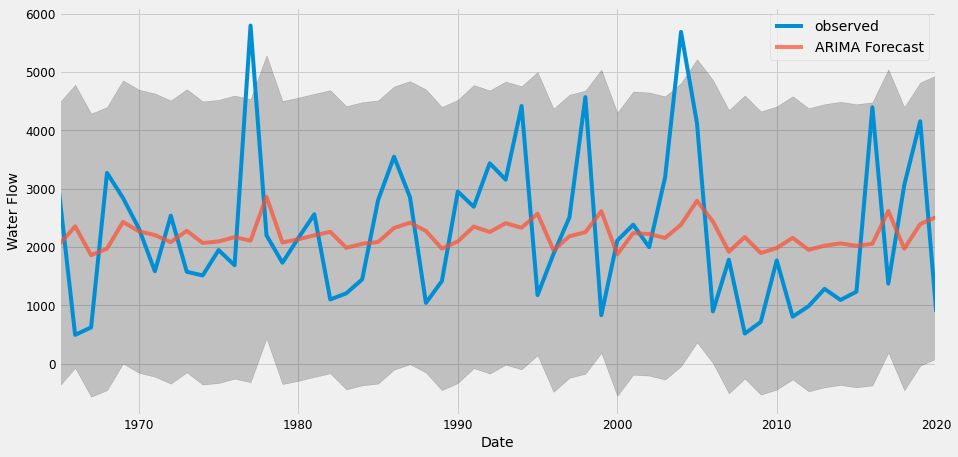

In [37]:
pred = model.get_prediction(start=pd.to_datetime('1965-01-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1965':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

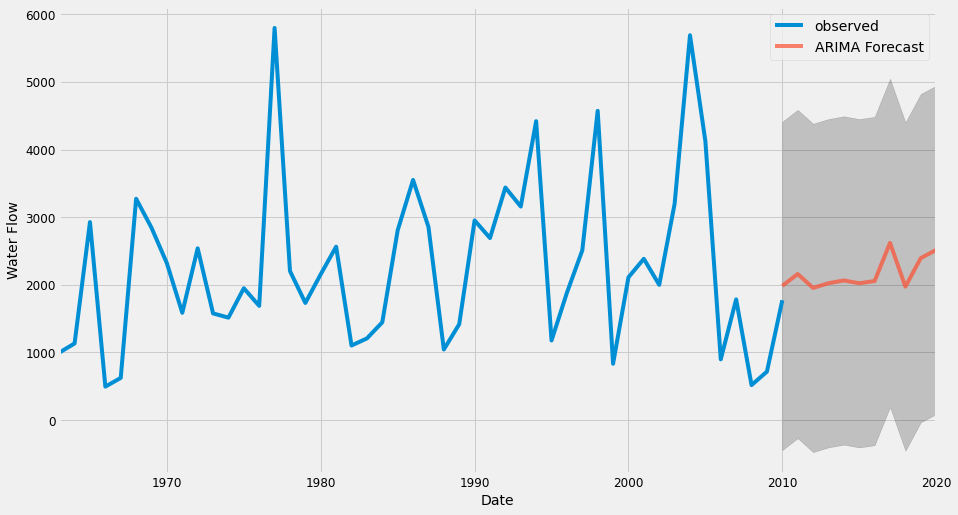

In [38]:
pred = model.get_prediction(start=pd.to_datetime('2010-01-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1963':'2010'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

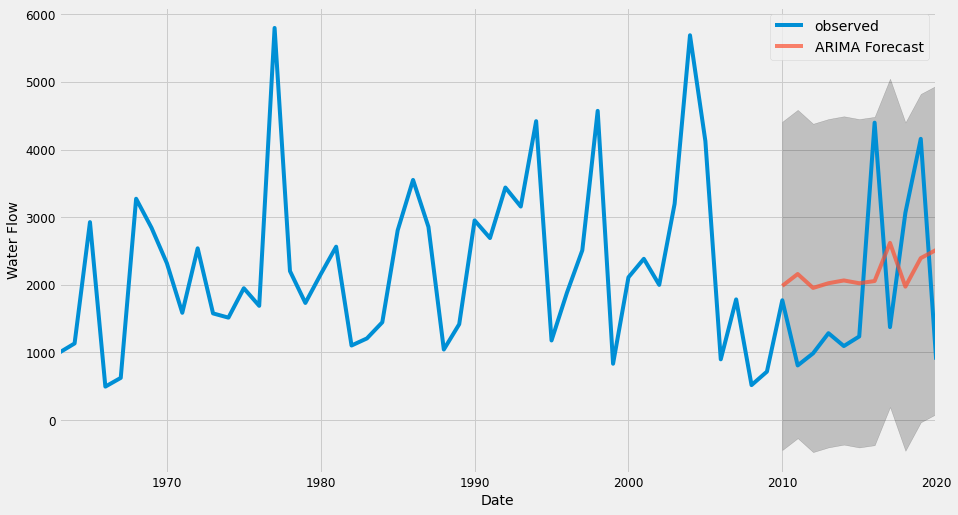

In [39]:
pred = model.get_prediction(start=pd.to_datetime('2010-01-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1963':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

In [40]:
forecast1 = pred.predicted_mean
actual1 = y
print('The ARIMA Mean Aboslute Percentage Error of our forecasts is {}'.format(np.mean(np.abs(forecast1 - actual1)/np.abs(actual1))))

The ARIMA Mean Aboslute Percentage Error of our forecasts is 0.8092462929755584


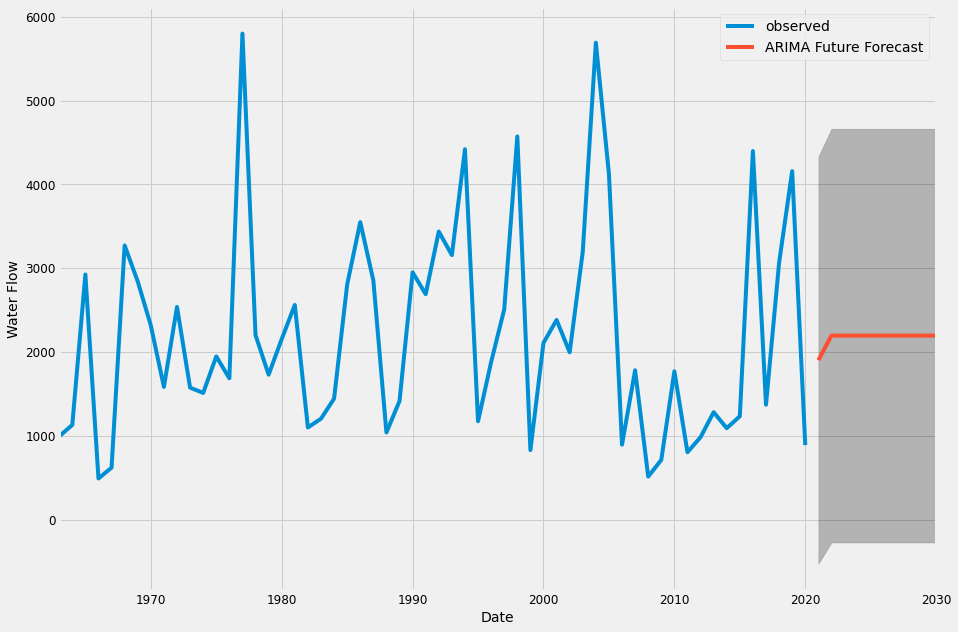

In [41]:
#Producing and visualizing forecasts
pred_uc = model.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 10))
pred_uc.predicted_mean.plot(ax=ax, label='ARIMA Future Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()


# GAUSSIAN IMPLEMENTATION 

In [42]:
import numpy as np
X = np.linspace(0.0, 58.0, num = 58)

In [43]:
X = np.atleast_2d(X).T#
X = X.reshape(-1,1)

In [44]:
print(y.head(10), y.shape)

Year
1963-01-01     997.2
1964-01-01    1133.8
1965-01-01    2927.0
1966-01-01     495.5
1967-01-01     624.8
1968-01-01    3272.7
1969-01-01    2843.4
1970-01-01    2318.7
1971-01-01    1586.7
1972-01-01    2540.0
Name: flow, dtype: float64 (58,)


In [239]:
#test train val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)

In [240]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel

k0 = WhiteKernel()

k1 = ConstantKernel() * \
  ExpSineSquared(length_scale=1,length_scale_bounds='fixed')

kernel_1  = k0 + k1 
model = GaussianProcessRegressor(n_restarts_optimizer=10, kernel=kernel_1)

In [241]:
#fitting model on train data
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=WhiteKernel(noise_level=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1),
                         n_restarts_optimizer=10)

In [242]:
#predicting model on test data
testpreds = model.predict(X_test)

In [243]:
testlabels = y_test

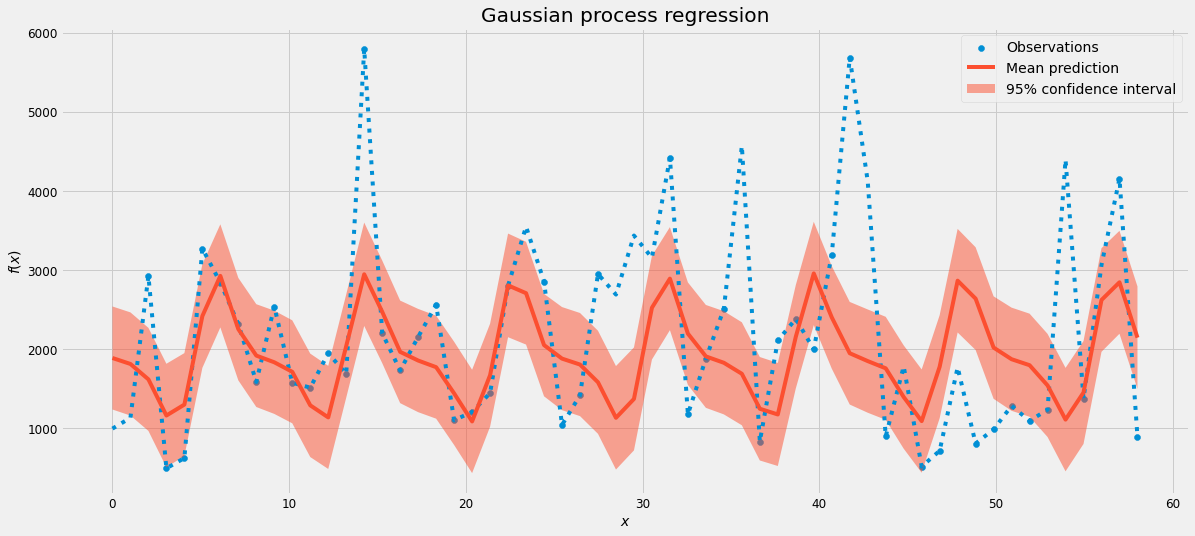

In [244]:
mean_prediction, std_prediction = model.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression")

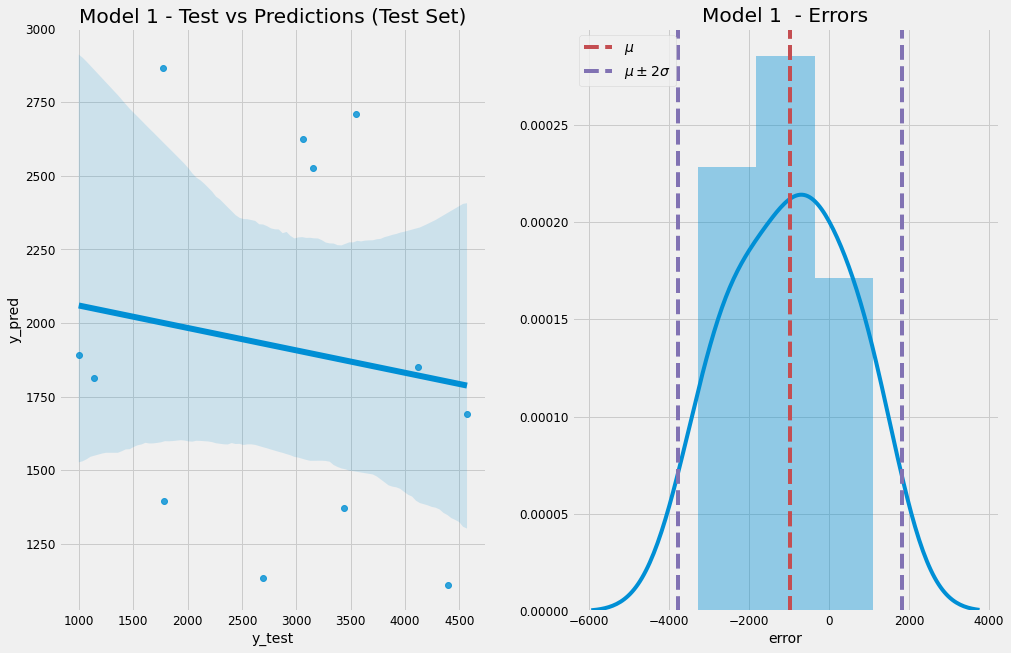

In [245]:
import seaborn as sns
errors = model.predict(X_test) - y_test
errors = errors.values.flatten()
errors_mean = errors.mean()
errors_std = errors.std()
sns_c = sns.color_palette(palette='deep')
fig, ax = plt.subplots(1, 2, figsize=(15, 10)) 
sns.regplot(x=y_test.values.flatten(), y=model.predict(X_test).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 1 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred');
ax[1].set(title='Model 1  - Errors', xlabel='error', ylabel=None);

In [246]:
#predicting model on test data
testpreds = model.predict(X_test)

In [247]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(testlabels, testpreds, squared= False)
#print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

1704.6946188571176

In [248]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(testlabels, testpreds)))

Root Mean Squared Error: 1704.6946188571176


In [249]:
mape = np.mean(np.abs(testpreds - testlabels)/np.abs(testlabels))  # MEAN ABSOLUTE PERCENTAGE ERROR
mape

0.501747982229288

In [250]:
mean_absolute_percentage_error(testlabels, testpreds)

0.501747982229288

In [251]:
from sklearn.metrics import mean_absolute_error
print(f'R2 Score Train = {model.score(X=X_train, y=y_train): 0.3f}')
print(f'R2 Score Test = {model.score(X=X_test, y=y_test): 0.3f}')
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train)): 0.3f}')
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)): 0.3f}')

R2 Score Train =  0.281
R2 Score Test = -1.096
MAE Train =  753.783
MAE Test =  1419.701


In [252]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1, length_scale_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

316**2 * RBF(length_scale=1)

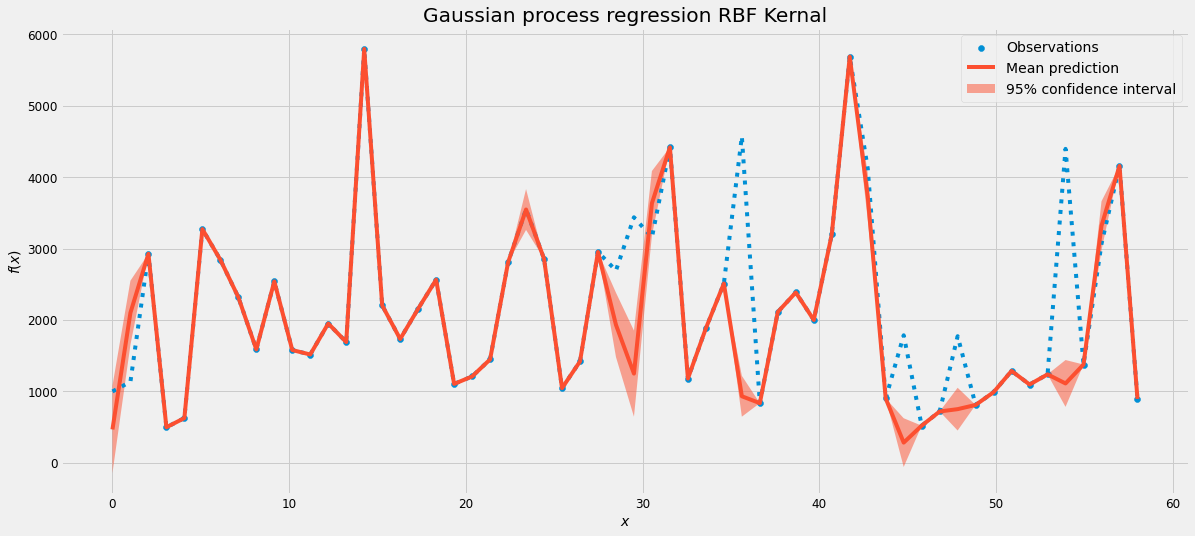

In [253]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression RBF Kernal")

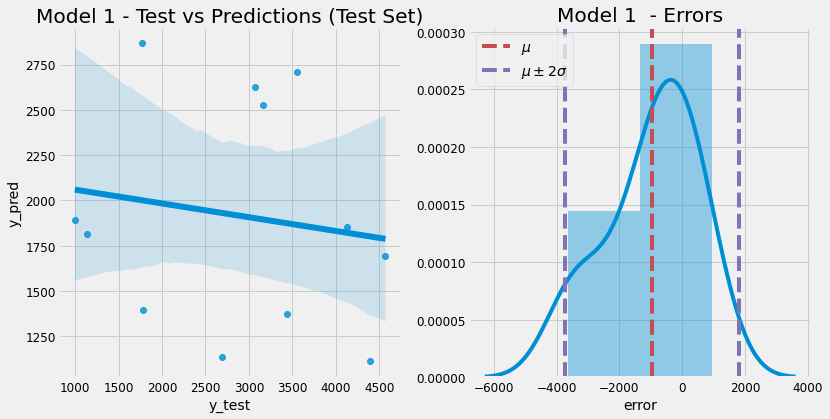

In [254]:
errors = gaussian_process.predict(X_test) - y_test
errors = errors.values.flatten()
errors_mean = errors.mean()
errors_std = errors.std()
sns_c = sns.color_palette(palette='deep')
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
sns.regplot(x=y_test.values.flatten(), y=model.predict(X_test).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 1 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred');
ax[1].set(title='Model 1  - Errors', xlabel='error', ylabel=None);

In [255]:
#predicting model on test data
testpreds = gaussian_process.predict(X_test)

In [256]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(testlabels, testpreds, squared= False)

1693.608764661292

In [257]:
mean_absolute_percentage_error(testlabels, testpreds)

0.46672006153636886

In [258]:
from sklearn.metrics import mean_absolute_error
print(f'R2 Score Train = {gaussian_process.score(X=X_train, y=y_train): 0.3f}')
print(f'R2 Score Test = {gaussian_process.score(X=X_test, y=y_test): 0.3f}')
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=gaussian_process.predict(X_train)): 0.3f}')
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=gaussian_process.predict(X_test)): 0.3f}')

R2 Score Train =  1.000
R2 Score Test = -1.069
MAE Train =  0.000
MAE Test =  1252.998


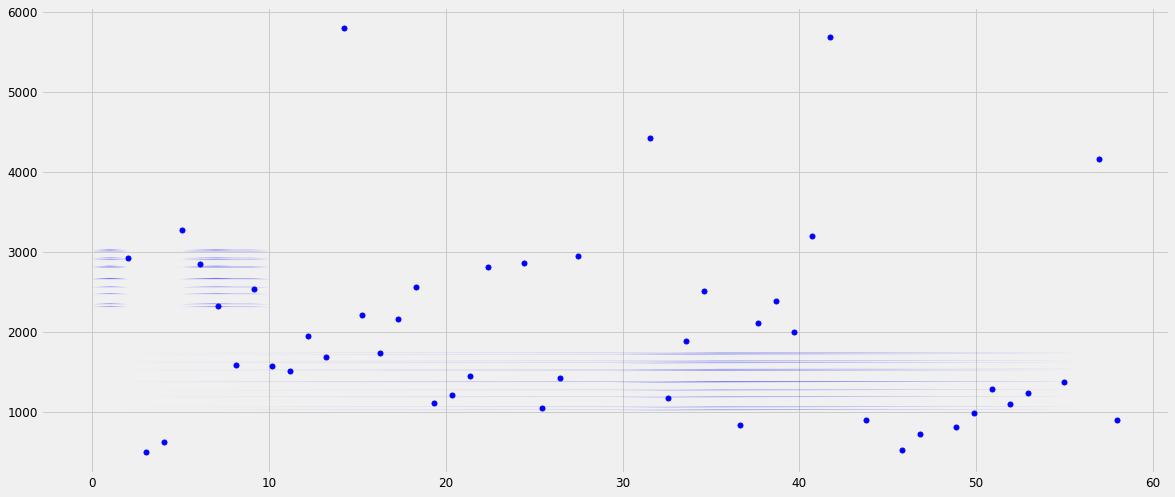

In [201]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

#gpr = GaussianProcessRegressor()

kernel = C(1.0, (1e-3, 1e3))*RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 9, alpha = 0.1, normalize_y = True)
gpr.fit(X_train, y_train)
y_prediction, std = gpr.predict(X_test, return_std = True)

confidence = std*1.96/np.sqrt(len(X_test))
confidence = confidence.reshape(-1,1)
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()

plt.plot(X_train, y_train, "b.", markersize=10, label="Observations")
plt.fill(X_test,
         y_prediction-confidence,
         y_prediction+confidence,
         alpha=0.3,
         fc="b",
         ec="None",
         label=r"95% confidence interval",
)

# LSTM IMPLEMENTAION

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [260]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [261]:
df= pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\Maximum Yearly discharge .csv", index_col='Year').dropna()

In [262]:
df

,flow
Year,
1963,997.20
1964,1133.80
1965,2927.00
1966,495.50
1967,624.80
1968,3272.70
1969,2843.40
1970,2318.70
1971,1586.70


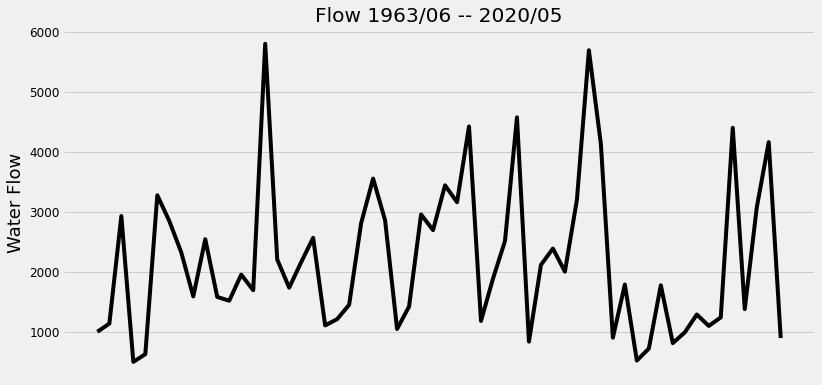

In [263]:
plt.figure(figsize=(12,6))
plt.title('Flow 1963/06 -- 2020/05')
plt.plot(df['flow'], color='black')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Water Flow', fontsize=18)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

In [264]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['flow'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

56

In [265]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09462824],
       [0.12039307],
       [0.45861783],
       [0.        ],
       [0.02438794],
       [0.5238221 ],
       [0.4428496 ],
       [0.34388321],
       [0.20581689],
       [0.38562375],
       [0.20414388],
       [0.19233091],
       [0.27430307],
       [0.2252254 ],
       [1.        ],
       [0.32213588],
       [0.23331699],
       [0.31338413],
       [0.39013165],
       [0.11462145],
       [0.13436569],
       [0.17940322],
       [0.43571994],
       [0.57627598],
       [0.44532046],
       [0.10341771],
       [0.17409559],
       [0.46340865],
       [0.4142744 ],
       [0.55503791],
       [0.50209363],
       [0.74006941],
       [0.128711  ],
       [0.26166585],
       [0.3800049 ],
       [0.76881814],
       [0.06381795],
       [0.30481912],
       [0.3563601 ],
       [0.28369422],
       [0.50957033],
       [0.97959938],
       [0.68437135],
       [0.07613075],
       [0.24323249],
       [0.00426459],
       [0.04178769],
       [0.240

In [274]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 5:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.09462824])]
[0.12039307405032254]

[array([0.09462824]), array([0.12039307])]
[0.12039307405032254, 0.4586178279075031]

[array([0.09462824]), array([0.12039307]), array([0.45861783])]
[0.12039307405032254, 0.4586178279075031, 0.0]

[array([0.09462824]), array([0.12039307]), array([0.45861783]), array([0.])]
[0.12039307405032254, 0.4586178279075031, 0.0, 0.024387943717228106]

[array([0.09462824]), array([0.12039307]), array([0.45861783]), array([0.]), array([0.02438794])]
[0.12039307405032254, 0.4586178279075031, 0.0, 0.024387943717228106, 0.5238220981553434]



In [275]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
55/55 [==============================] - 2s 2ms/step - loss: 0.0697
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 13/20
55/55 [==============================

In [276]:
# Create the testing data set
test_data = scaled_data[training_data_len - 1: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(1, len(test_data)):
    x_test.append(test_data[i-1:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3006.9814064729417

In [277]:
print('The LSTM Mean Aboslute Percentage Error of our forecasts is {}'.format(np.mean(np.abs(predictions -y_test)/np.abs(y_test))))

The LSTM Mean Aboslute Percentage Error of our forecasts is 0.9997391308449353


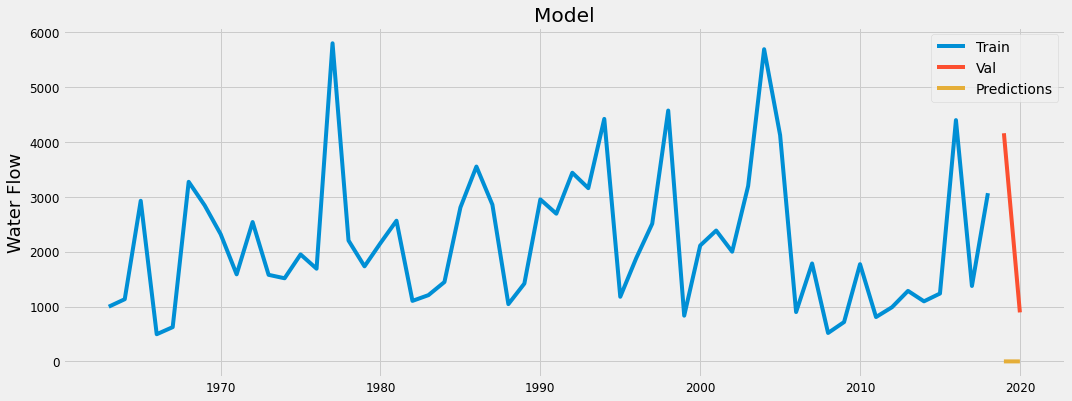

In [278]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
#plt.xlabel('Date', fontsize=18)
plt.ylabel('Water Flow', fontsize=18)
plt.plot(train['flow'])
plt.plot(valid[['flow', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()